# Proyecto 3: Predicción de precios de propiedades

¡Bienvenidos al tercer proyecto de la carrera de Data Science de Acamica! 

En este proyecto vamos a seguir trabajando con el dataset de propiedades en venta publicadas en el portal [Properati](www.properati.com.ar). El objetivo en este caso armar nuestros primeros modelos para predecir el precio de las propiedades en dólares.

Las columnas que se agregan son:

* `barrios_match`: si coincide el barrio publicado con el geográfico vale 1, si no 0.

* `PH`, `apartment`, `house`: variables binarias que indican el tipo de propiedad.

* dummies de barrios: variables binarias con 1 o 0 según el barrio.

La métrica que vamos a usar para medir es RMSE (raíz del error cuadrático medio), cuya fórmula es:

$$RMSE = \sqrt{\frac{\sum_{t=1}^n (\hat y_t - y_t)^2}{n}}$$

In [24]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
import pydotplus
from IPython.display import Image
pd.set_option('display.float_format', lambda x: '%.3f' % x)

path_dataset = 'datos_properati_limpios_model.csv'
df = pd.read_csv(path_dataset)
df.head()

,lat,lon,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,rooms,barrio_match,PH,apartment,house,...,VILLA LUGANO,VILLA LURO,VILLA ORTUZAR,VILLA PUEYRREDON,VILLA REAL,VILLA RIACHUELO,VILLA SANTA RITA,VILLA SOLDATI,VILLA URQUIZA,outlier_price_m2
0,-34.589,-58.417,170000.000,40.000,38.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,-34.591,-58.418,90000.000,27.000,27.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,-34.587,-58.437,150000.000,44.000,44.000,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,-34.593,-58.428,154000.000,58.000,58.000,2,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-34.593,-58.428,154000.000,58.000,58.000,3,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
print("El dataset que vamos a trabajar aquí tiene {} observaciones".format(df.shape[0]))
from sklearn.model_selection import train_test_split


El dataset que vamos a trabajar aquí tiene 6376 observaciones


El objetivo de este proyecto es poder trabajar en el ajuste de modelos y su posterior evaluación.

Para empezar vamos a separar el `dataset` en un conjunto de entrenamiento (80%) y un conjunto de test (20%). 

**Separá el dataset** en `X_train`, `X_test`, `y_train` e `y_test` con el tamaño correspondiente

In [26]:

X, y = df.drop(df.columns[2], axis=1), df.iloc[:,2]

from sklearn.model_selection import train_test_split
X_entrenamiento, X_prueba, y_entrenamiento, y_prueba = train_test_split(X, y, test_size=0.20, random_state= 2)

y.describe()
    




count     6376.000
mean    120950.254
std      31336.842
min      60529.000
25%      95000.000
50%     120000.000
75%     145815.000
max     179999.000
Name: price_aprox_usd, dtype: float64

## Árboles de decisión

Lo primero que vamos a hacer es entrenar un árbol de decisión y usar de métrica al `RMSE`. 



In [27]:
dtree = tree.DecisionTreeRegressor(max_depth = 5)
dtree.fit(X_entrenamiento,y_entrenamiento)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

Con el modelo entrenado **realizamos la predicción** sobre el conjunto de test `X_test` y guardá el resultado en una variable `y_pred`.

In [28]:
y_pred = dtree.predict(X_prueba)
y_pred

array([144462.17941953, 115819.73560091, 146368.32916667, ...,
       114065.03612466, 115819.73560091, 116301.36992126])

**Calculamos el rmse** sacando la raíz cuadrada de `mean_squared_error` entre `y_test` e `y_pred` y **mostrá** el resultado

In [29]:
mean_squared_error(y_prueba, y_pred)
print('El RMSE es {0}', np.sqrt(mean_squared_error(y_prueba, y_pred)))

El RMSE es {0} 21357.624054404412


__Analizar el cambio en el RMSE a medida que es más profundo el árbol de decisión, tanto en training como en testing.__

Para esto, **iteramos** de 5 en 5 en el parámetro `max_depth` y **observá** como impacta en el RMSE. 


In [30]:
rmses_test = []
rmses_train = []

for d in range (1,30,5):
    
    dtree = tree.DecisionTreeRegressor(max_depth = d )
    dtree.fit(X_entrenamiento,y_entrenamiento)
    
    y_pred1 = dtree.predict(X_entrenamiento)
    y_pred2 = dtree.predict(X_prueba)
    
    rmses_train.append(np.sqrt(mean_squared_error(y_pred1, y_entrenamiento)))
    rmses_test.append(np.sqrt(mean_squared_error(y_pred2, y_prueba)))
rmses_train                 

[26855.266401247784,
 20316.116187425443,
 14345.786471229778,
 7781.468780671853,
 3458.894041425858,
 1247.0835932831815]

Ahora graficamos los valores que guardamos en los arreglos `rmses_train` y `rmses_test`

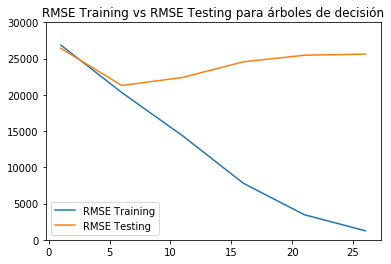

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 
plt.plot(range(1,30, 5), rmses_train, label='RMSE Training')
plt.plot(range(1,30, 5), rmses_test, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para árboles de decisión")
plt.show()

Podemos ver aquí como el modelo presenta sobreajuste dado que a mayor complejidad (en este caso, mayor profundidad del árbol) más diferencia entre los resultados de training y testing. También observamos como la curva de testing decrece y luego vuelvo a crecer. El punto donde se minimiza está relacionado con el tradeoff entre sesgo y varianza que vamos a ver en la próxima unidad.

## KNN

**Entrená un knn** y nuevamente medir el **rmse** en el conjunto de testing


In [32]:
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.preprocessing  import  StandardScaler 

normalizador =  StandardScaler().fit(X_entrenamiento)
X_entrenamiento_norm = normalizador.transform(X_entrenamiento)

modelo = KNeighborsRegressor( n_neighbors = 5, weights= 'uniform')
modelo.fit(X_entrenamiento_norm,y_entrenamiento)
y_predit_knn = modelo.predict (X_entrenamiento_norm)
mean_squared_error(y_prueba, y_pred)
print('El RMSE es ', np.sqrt(mean_squared_error(y_prueba, y_pred)))

C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


El RMSE es  21357.624054404412


__Analizar el cambio en el RMSE a medida que consideramos más vecinos para KNN, tanto en training como en testing.__

Para esto, **iterá** incrementando de a uno el parámetro `n_neighbors` y **observá** como impacta en el RMSE. 

**Creá** dos arreglos `rmses_train` y `rmses_test` para ir guardando los **rmse** de cada profundidad

In [35]:
rmses_test_knn = []
rmses_train_knn = []

for vecinos in range (1,30,1):
    modelo = KNeighborsRegressor( n_neighbors = vecinos, weights= 'uniform')
    modelo.fit(X_entrenamiento,y_entrenamiento)
    y_pred_knn1 = modelo.predict (X_entrenamiento)
    y_pred_knn2  = modelo.predict (X_prueba)
    rmses_train_knn.append (np.sqrt(mean_squared_error(y_pred_knn1, y_entrenamiento)))
    rmses_test_knn.append (np.sqrt(mean_squared_error(y_pred_knn2, y_prueba)))


    
    


C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\sando\.conda\envs\ds\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning

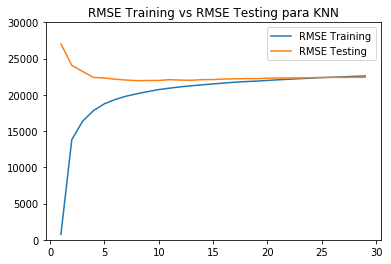

In [36]:
plt.plot(range(1,30, 1), rmses_train_knn, label='RMSE Training')
plt.plot(range(1,30, 1), rmses_test_knn, label='RMSE Testing')
plt.ylim((0, 30000))
plt.legend(loc="best")
plt.title("RMSE Training vs RMSE Testing para KNN")
plt.show()

**Calcular el RMSE promedio del resultado de cross validation para un árbol de decisión. 
Como parámetros deberás usar:**
- 10 folds
- profundidad 5
- scoring neg_mean_squared_error.

El árbol de decisión guardalo en una variable llamada `regressor` para poder reutilizarla luego.

Atención: `cross_validation_score` de `scikit-learn` usá la métrica `neg_mean_squared_error` (NMSE) en vez de `mean_square_error` (MSE). 

`NMSE` es lo mismo que `MSE` pero con un signo negativo. 

Como nosotros queremos obtener el `MSE` para calcular sobre él el `RMSE`, vamos a definir un método `nmsq2rmse` para hacer esa conversión de `NMSE` a `MSE`
.

In [12]:
def nmsq2rmse(score):
    return np.sqrt(-score)
regressor = tree.DecisionTreeRegressor(max_depth = 10)

In [23]:
# Calculá en esta celda los cross_val_score
from sklearn.model_selection import cross_val_score
score = cross_val_score( dtree, X , y , cv= 5, scoring ='neg_mean_squared_error')
nmsq2rmse(score)

array([29231.35593284, 30528.44146132, 29030.84873463, 29394.51512484,
       29253.2511262 ])

Para ver el resultado final, reentrenamos al regresor y mostramos en un dataframe la comparación entre los valores reales, los predichos y su diferencia

In [14]:
regressor.fit(X_entrenamiento, y_entrenamiento)
y_pred = regressor.predict(X_prueba)
val_real = pd.Series(y_prueba.values)
val_pred = pd.Series(y_pred)

In [15]:
predicciones = pd.concat([val_real.rename('Valor real'),val_pred.rename('Valor Pred') ,abs(val_real-val_pred).rename('Dif(+/-)')] ,  axis=1)

In [16]:
predicciones.head(10)

,Valor real,Valor Pred,Dif(+/-)
0,165000.000,151007.595,13992.405
1,72000.000,119326.027,47326.027
2,175000.000,150579.310,24420.690
3,145000.000,126026.250,18973.750
4,157000.000,152023.810,4976.190
5,101273.560,108631.250,7357.690
6,140000.000,98942.211,41057.789
7,83500.000,125000.000,41500.000
8,175000.000,148800.000,26200.000
9,131700.000,124590.000,7110.000
